Elementary School Hours Daily Average with Classifications:
                PM2.5       PM10            PM2.5_Classification  \
Date                                                               
2024-01-01  36.366667  40.666667  Unhealthy for Sensitive Groups   
2024-01-02  13.066667  15.833333                        Moderate   
2024-01-03  19.583333  25.666667                        Moderate   
2024-01-04   4.283333   4.333333                            Good   
2024-01-05   8.050000  14.833333                            Good   
...               ...        ...                             ...   
2024-12-27  16.316667  27.000000                        Moderate   
2024-12-28  19.950000  30.166667                        Moderate   
2024-12-29  23.666667  30.166667                        Moderate   
2024-12-30  27.683333  34.666667                        Moderate   
2024-12-31  24.716667  28.500000                        Moderate   

           PM10_Classification  
Date                  

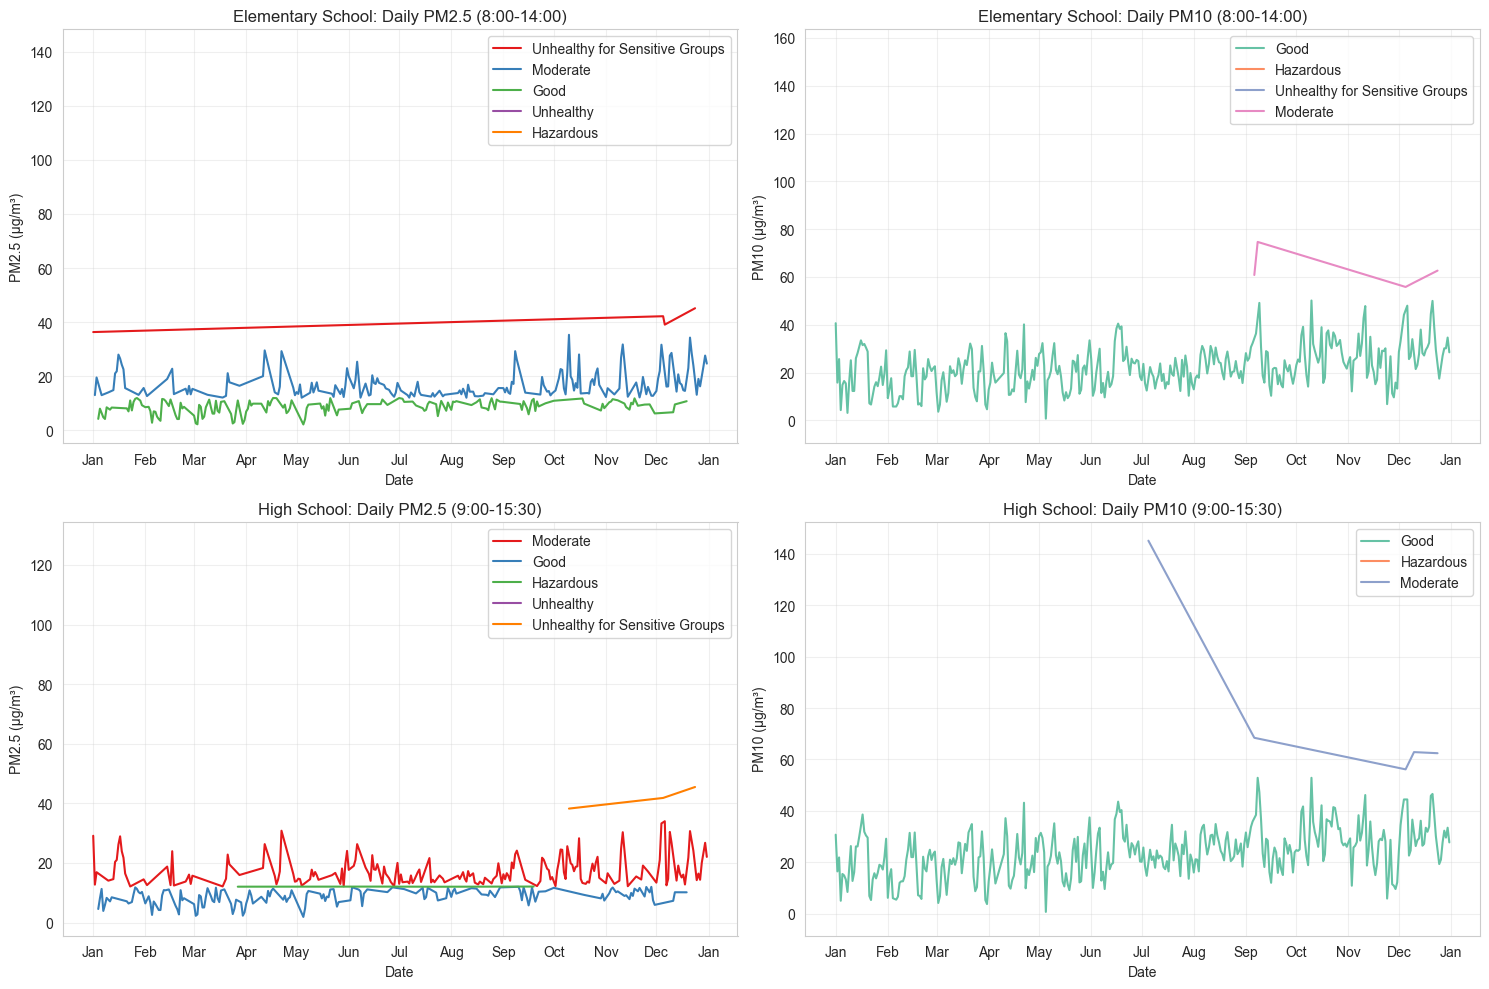

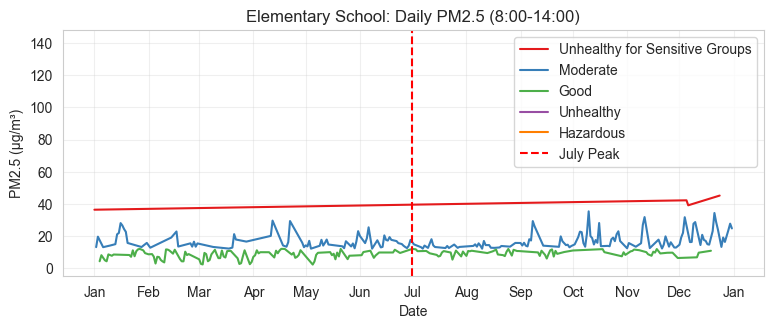

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("air_quality_data.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Date'] = df['Datetime'].dt.date
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

elem_mask = (df['Hour'] >= 8) & (df['Hour'] < 14)

high_mask = ((df['Hour'] > 9) & (df['Hour'] < 15)) | \
            ((df['Hour'] == 9) & (df['Minute'] >= 0)) | \
            ((df['Hour'] == 15) & (df['Minute'] <= 30))

elem_df = df[elem_mask]
high_df = df[high_mask]

elem_avg_daily = elem_df.groupby('Date')[['PM2.5', 'PM10']].mean()
high_avg_daily = high_df.groupby('Date')[['PM2.5', 'PM10']].mean()

def classify_air_quality(pollutant, value):
    if pollutant == 'PM2.5':
        if 0.0 <= value <= 12.0:
            return 'Good'
        elif 12.1 <= value <= 35.4:
            return 'Moderate'
        elif 35.5 <= value <= 55.4:
            return 'Unhealthy for Sensitive Groups'
        elif 55.5 <= value <= 150.4:
            return 'Unhealthy'
        elif 150.5 <= value <= 250.4:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'
    elif pollutant == 'PM10':
        if 0 <= value <= 54:
            return 'Good'
        elif 55 <= value <= 154:
            return 'Moderate'
        elif 155 <= value <= 254:
            return 'Unhealthy for Sensitive Groups'
        elif 255 <= value <= 354:
            return 'Unhealthy'
        elif 355 <= value <= 424:
            return 'Very Unhealthy'
        else:
            return 'Hazardous'

elem_avg_daily['PM2.5_Classification'] = elem_avg_daily['PM2.5'].apply(lambda x: classify_air_quality('PM2.5', x))
elem_avg_daily['PM10_Classification'] = elem_avg_daily['PM10'].apply(lambda x: classify_air_quality('PM10', x))

high_avg_daily['PM2.5_Classification'] = high_avg_daily['PM2.5'].apply(lambda x: classify_air_quality('PM2.5', x))
high_avg_daily['PM10_Classification'] = high_avg_daily['PM10'].apply(lambda x: classify_air_quality('PM10', x))

print("Elementary School Hours Daily Average with Classifications:")
print(elem_avg_daily)
print("\nHigh School Hours Daily Average with Classifications:")
print(high_avg_daily)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=elem_avg_daily, x=elem_avg_daily.index, y='PM2.5', hue='PM2.5_Classification', palette='Set1')
plt.title('Elementary School: Daily PM2.5 (8:00-14:00)')
plt.ylabel('PM2.5 (µg/m³)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(data=elem_avg_daily, x=elem_avg_daily.index, y='PM10', hue='PM10_Classification', palette='Set2')
plt.title('Elementary School: Daily PM10 (8:00-14:00)')
plt.ylabel('PM10 (µg/m³)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(data=high_avg_daily, x=high_avg_daily.index, y='PM2.5', hue='PM2.5_Classification', palette='Set1')
plt.title('High School: Daily PM2.5 (9:00-15:30)')
plt.ylabel('PM2.5 (µg/m³)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(data=high_avg_daily, x=high_avg_daily.index, y='PM10', hue='PM10_Classification', palette='Set2')
plt.title('High School: Daily PM10 (9:00-15:30)')
plt.ylabel('PM10 (µg/m³)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

elem_pivot = elem_df.pivot_table(index='Date', columns='Hour', values='PM2.5', aggfunc='mean')
high_pivot = high_df.pivot_table(index='Date', columns='Hour', values='PM2.5', aggfunc='mean')



plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
sns.lineplot(data=elem_avg_daily, x=elem_avg_daily.index, y='PM2.5', hue='PM2.5_Classification', palette='Set1')
plt.axvline(pd.Timestamp('2024-07-01'), color='red', linestyle='--', label='July Peak')
plt.title('Elementary School: Daily PM2.5 (8:00-14:00)')
plt.ylabel('PM2.5 (µg/m³)')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


Time spent in each PM2.5 category:
PM2.5_Category
Good                              4394
Moderate                          4052
Unhealthy for Sensitive Groups     135
Unhealthy                           17
Very Unhealthy                       4
Hazardous                            1
Name: count, dtype: int64

Time spent in each PM10 category:
PM10_Category
Good                              8318
Moderate                           279
Unhealthy for Sensitive Groups       5
Unhealthy                            2
Very Unhealthy                       0
Hazardous                            0
Name: count, dtype: int64


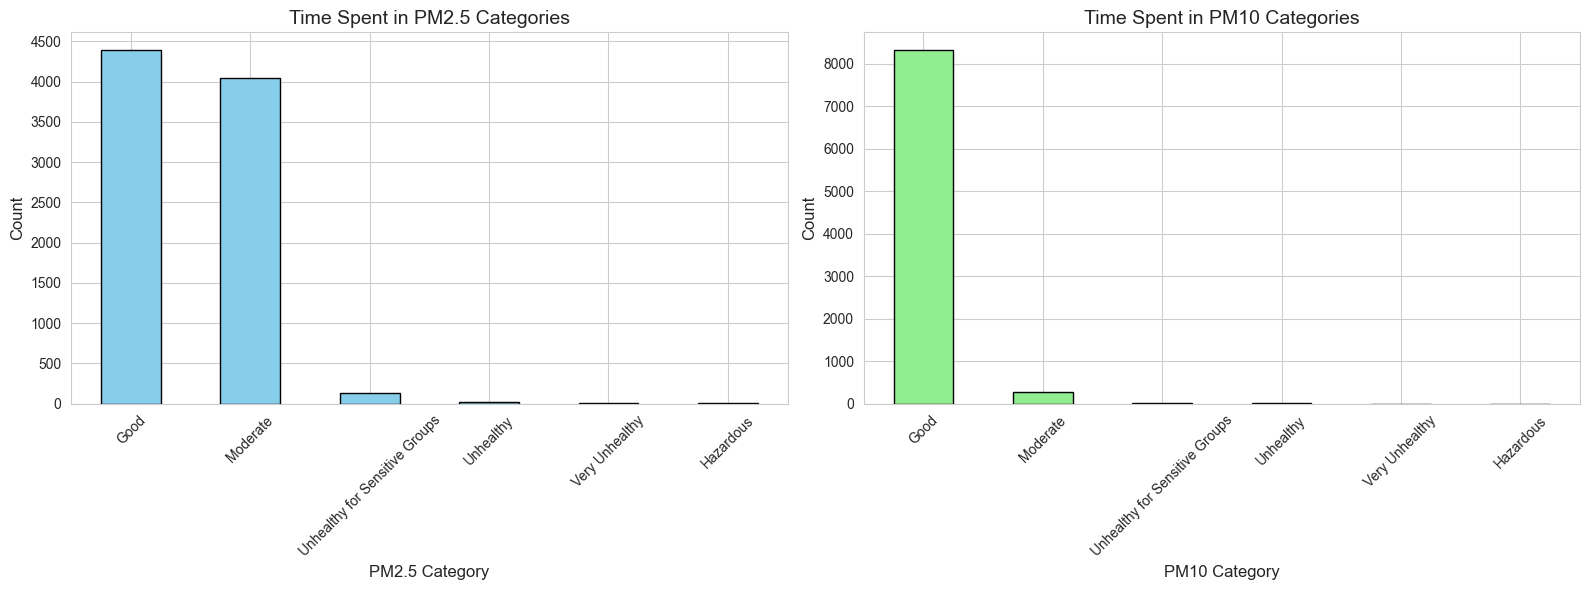

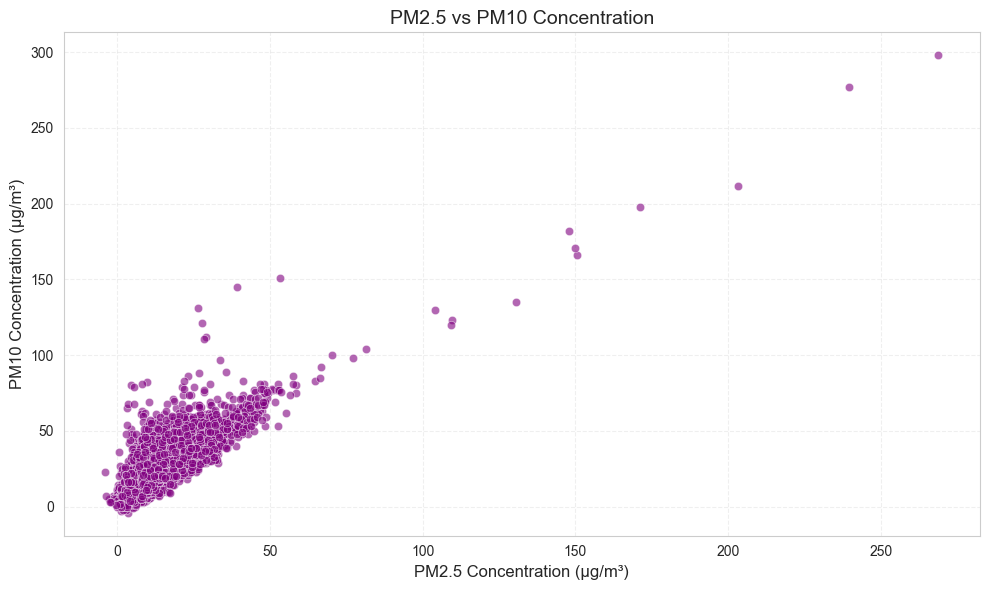

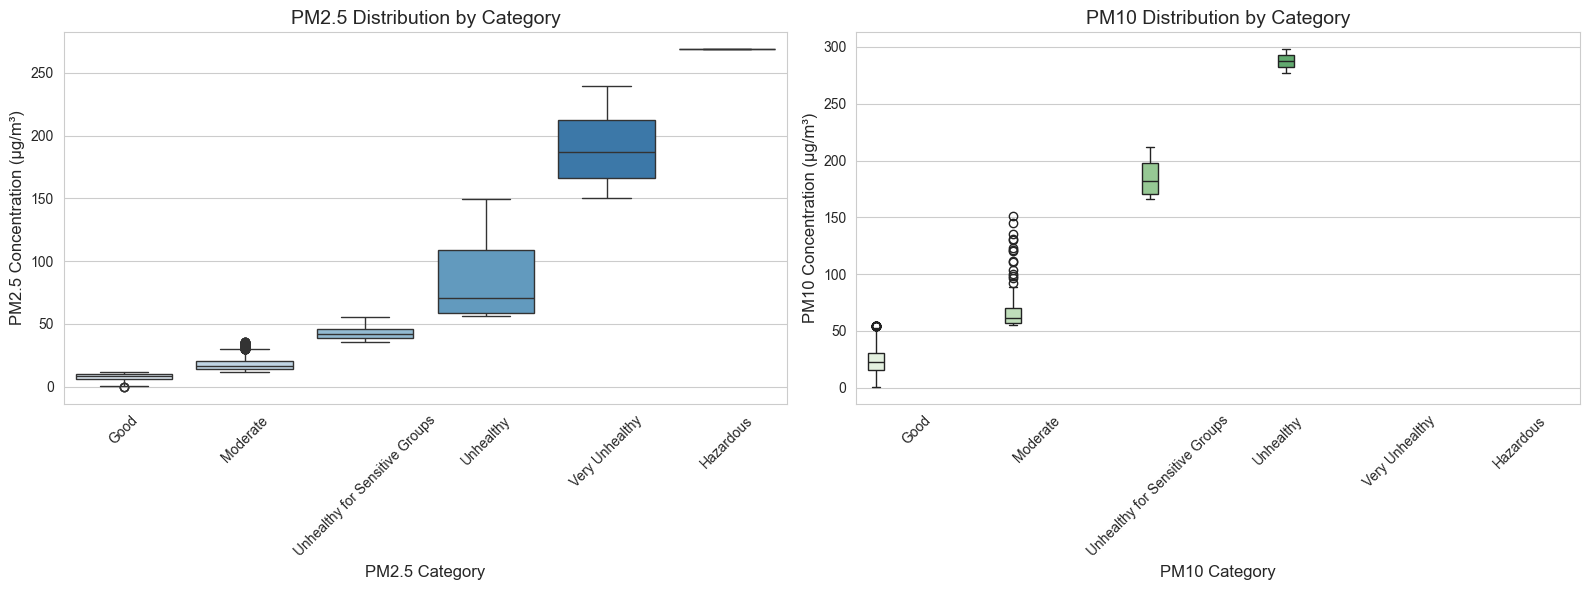

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

df = pd.read_csv("air_quality_data.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])

pm25_bins = [0.0, 12.0, 35.4, 55.4, 150.4, 250.4, float('inf')]
pm25_labels = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

pm10_bins = [0, 54, 154, 254, 354, 424, float('inf')]
pm10_labels = [
    'Good',
    'Moderate',
    'Unhealthy for Sensitive Groups',
    'Unhealthy',
    'Very Unhealthy',
    'Hazardous'
]

df['PM2.5_Category'] = pd.cut(df['PM2.5'], bins=pm25_bins, labels=pm25_labels, right=True)
df['PM10_Category'] = pd.cut(df['PM10'], bins=pm10_bins, labels=pm10_labels, right=True)

pm25_time = df['PM2.5_Category'].value_counts().sort_index()
pm10_time = df['PM10_Category'].value_counts().sort_index()

print("Time spent in each PM2.5 category:")
print(pm25_time)

print("\nTime spent in each PM10 category:")
print(pm10_time)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

pm25_time.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Time Spent in PM2.5 Categories', fontsize=14)
ax1.set_xlabel('PM2.5 Category', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

pm10_time.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Time Spent in PM10 Categories', fontsize=14)
ax2.set_xlabel('PM10 Category', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PM2.5', y='PM10', alpha=0.6, color='purple')
plt.title('PM2.5 vs PM10 Concentration', fontsize=14)
plt.xlabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.ylabel('PM10 Concentration (µg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df, x='PM2.5_Category', y='PM2.5', hue='PM2.5_Category', 
            ax=ax1, palette='Blues', legend=False)
ax1.set_title('PM2.5 Distribution by Category', fontsize=14)
ax1.set_xlabel('PM2.5 Category', fontsize=12)
ax1.set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='PM10_Category', y='PM10', hue='PM10_Category', 
            ax=ax2, palette='Greens', legend=False)
ax2.set_title('PM10 Distribution by Category', fontsize=14)
ax2.set_xlabel('PM10 Category', fontsize=12)
ax2.set_ylabel('PM10 Concentration (µg/m³)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [45]:
import pandas as pd

df = pd.read_csv('weather_data_hourly.csv', header=None, names=['date', 'temp', 'desc', 'rain'])

df = df.dropna(subset=['temp'])

df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

df = df.dropna(subset=['temp'])

avg_temp_per_day = df.groupby('date')['temp'].mean().reset_index(name='avg_temp_during_school_hours')

print(avg_temp_per_day)


           date  avg_temp_during_school_hours
0    2024-01-01                     60.090909
1    2024-01-02                     60.090909
2    2024-01-03                     60.090909
3    2024-01-04                     60.090909
4    2024-01-05                     60.090909
..          ...                           ...
361  2024-12-27                     60.090909
362  2024-12-28                     60.090909
363  2024-12-29                     60.090909
364  2024-12-30                     60.181818
365  2024-12-31                     60.181818

[366 rows x 2 columns]


Total number of days: 366
Total number of rainy days: 160
Total number of non-rainy days: 206
Percentage of rainy days: 43.72%
Average number of rainy days per week: 22.86
Average number of rainy days per month: 13.33


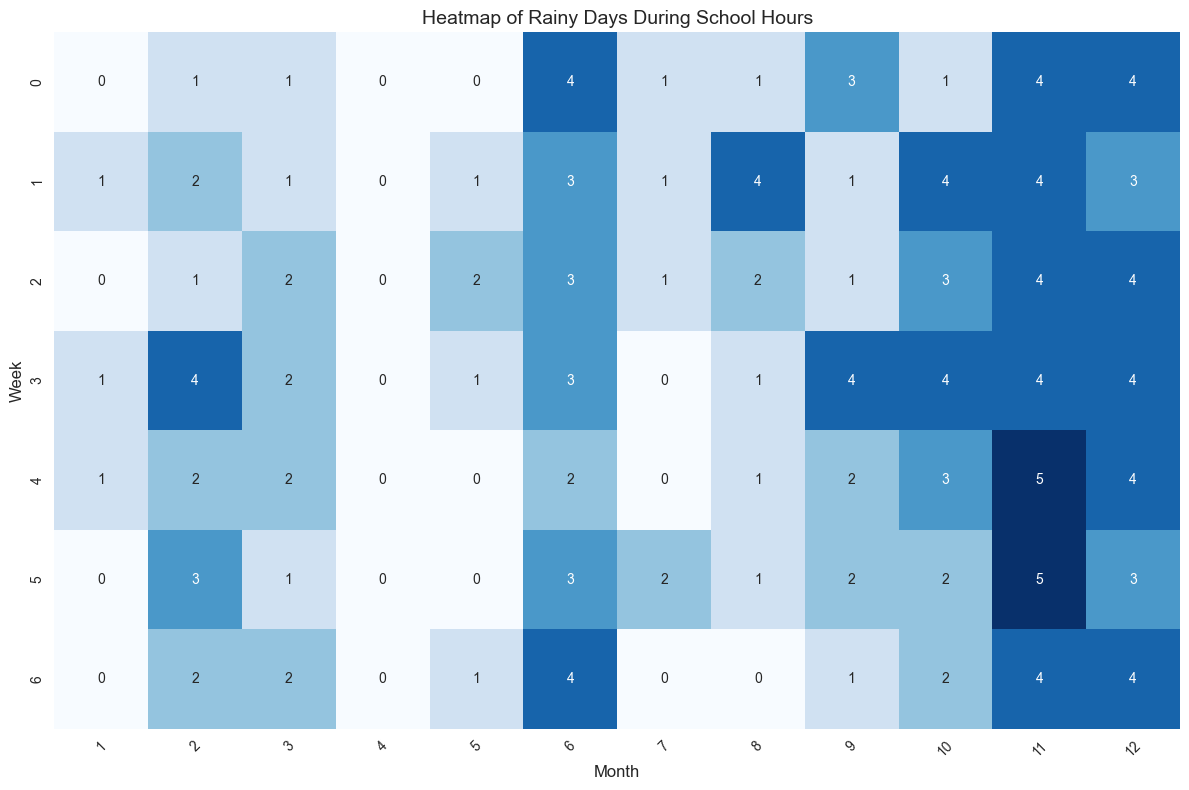

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weather_data_hourly.csv")
df['Date'] = pd.to_datetime(df['Date'])

rainy_days = df.groupby('Date')['Rain (yes/no)'].apply(lambda x: 'yes' in x.values).reset_index(name='Rained')

rainy_days['Month'] = rainy_days['Date'].dt.month
rainy_days['Week'] = rainy_days['Date'].dt.weekday

total_days = rainy_days.shape[0]
total_rainy_days = rainy_days['Rained'].sum()
total_non_rainy_days = total_days - total_rainy_days
rainy_percentage = (total_rainy_days / total_days) * 100

avg_rainy_days_per_week = rainy_days.groupby('Week')['Rained'].sum().mean()
avg_rainy_days_per_month = rainy_days.groupby('Month')['Rained'].sum().mean()

print(f"Total number of days: {total_days}")
print(f"Total number of rainy days: {total_rainy_days}")
print(f"Total number of non-rainy days: {total_non_rainy_days}")
print(f"Percentage of rainy days: {rainy_percentage:.2f}%")
print(f"Average number of rainy days per week: {avg_rainy_days_per_week:.2f}")
print(f"Average number of rainy days per month: {avg_rainy_days_per_month:.2f}")

rainy_heatmap = rainy_days.pivot_table(index='Week', columns='Month', values='Rained', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(rainy_heatmap, annot=True, cmap='Blues', cbar=False, fmt="d")
plt.title('Heatmap of Rainy Days During School Hours', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Week', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\galah\AppData\Local\Temp\ipykernel_27636\1768167296.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Exposure Summary for PM2.5 (Air Quality per Day):
PM2.5_Air_Quality  Good  Hazardous  Moderate  Unhealthy  \
Date                                                      
2024-01-01           10          0        10          0   
2024-01-02           13          0        11          0   
2024-01-03           11          0        13          0   
2024-01-04           24          0         0          0   
2024-01-05           22          0         2          0   
...                 ...        ...       ...        ...   
2024-12-27            8          0        16          0   
2024-12-28            5          0        19          0   
2024-12-29            2          0        22          0   
2024-12-30            2          0        20          0   
2024-12-31            0          0        19          0   

PM2.5_Air_Quality  Unhealthy for Sensitive Groups  Very Unhealthy  
Date                                                               
2024-01-01                                    

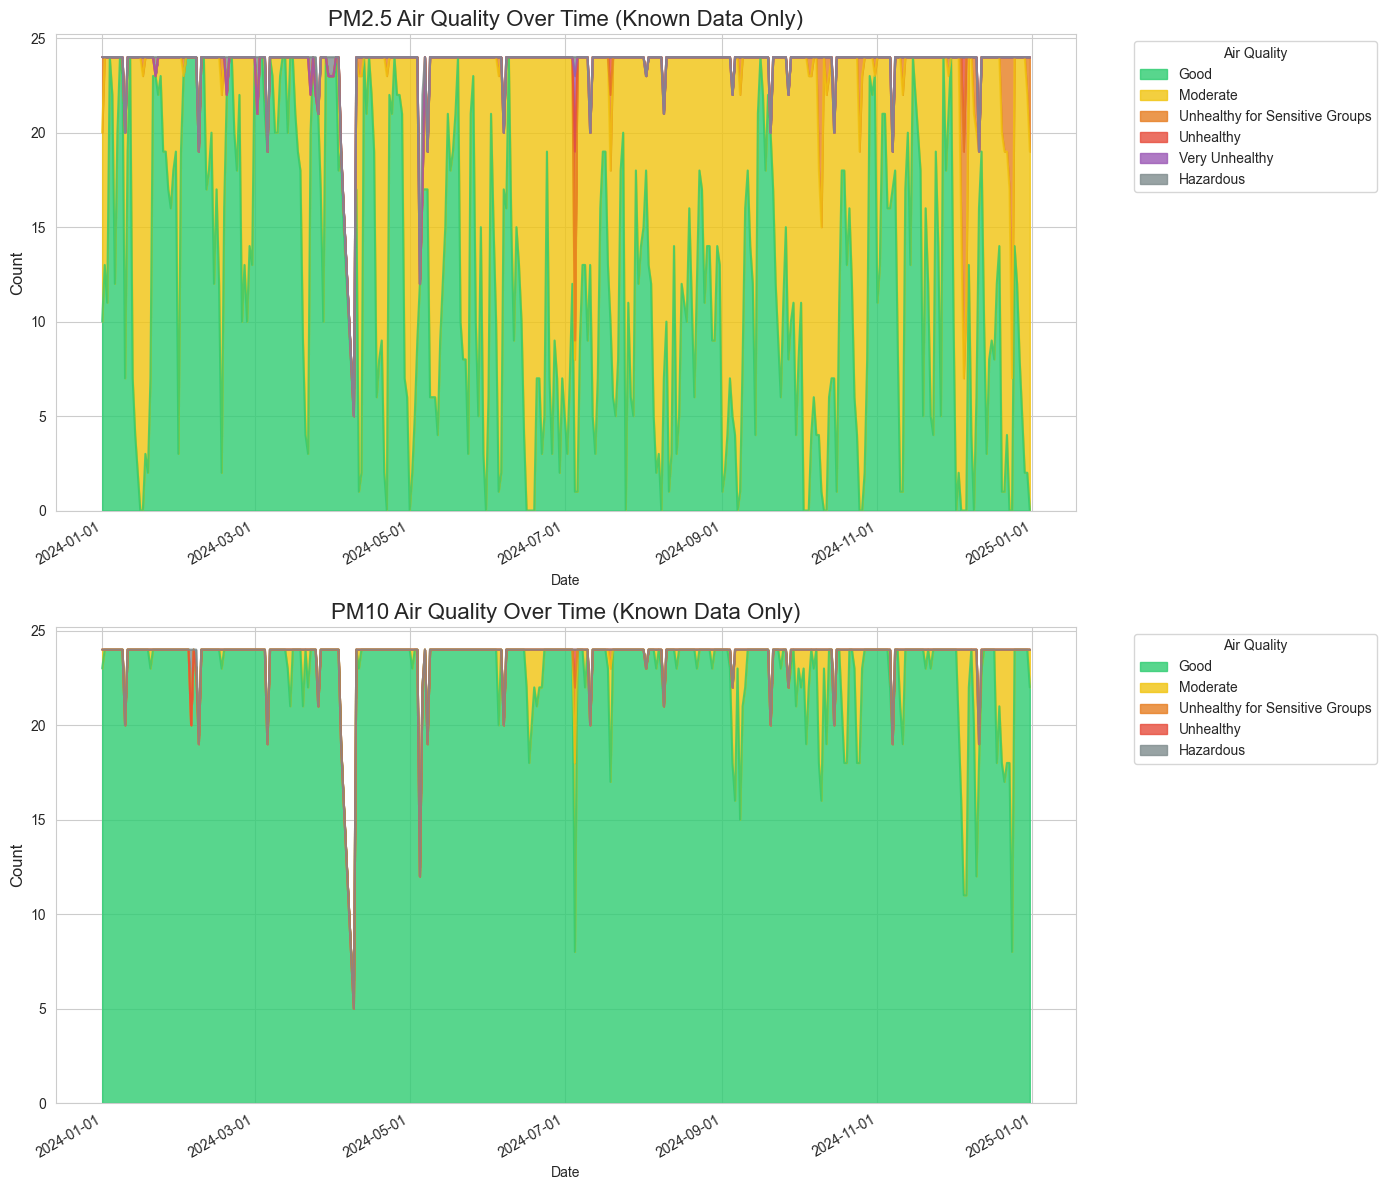

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]
quality_colors = {
    'Good': '#2ecc71',
    'Moderate': '#f1c40f',
    'Unhealthy for Sensitive Groups': '#e67e22',
    'Unhealthy': '#e74c3c',
    'Very Unhealthy': '#9b59b6',
    'Hazardous': '#7f8c8d'
}

df = pd.read_csv("air_quality_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

def classify_pm25(pm25):
    if pd.isna(pm25):
        return None
    elif 0.0 <= pm25 <= 12.0:
        return 'Good'
    elif 12.1 <= pm25 <= 35.4:
        return 'Moderate'
    elif 35.5 <= pm25 <= 55.4:
        return 'Unhealthy for Sensitive Groups'
    elif 55.5 <= pm25 <= 150.4:
        return 'Unhealthy'
    elif 150.5 <= pm25 <= 250.4:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

def classify_pm10(pm10):
    if pd.isna(pm10):
        return None
    elif 0 <= pm10 <= 54:
        return 'Good'
    elif 55 <= pm10 <= 154:
        return 'Moderate'
    elif 155 <= pm10 <= 254:
        return 'Unhealthy for Sensitive Groups'
    elif 255 <= pm10 <= 354:
        return 'Unhealthy'
    elif 355 <= pm10 <= 424:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['PM2.5_Air_Quality'] = df['PM2.5'].apply(classify_pm25)
df['PM10_Air_Quality'] = df['PM10'].apply(classify_pm10)

df_clean = df.dropna(subset=['PM2.5_Air_Quality', 'PM10_Air_Quality'])

pm25_summary = df_clean.groupby(['Date', 'PM2.5_Air_Quality']).size().unstack(fill_value=0)
pm10_summary = df_clean.groupby(['Date', 'PM10_Air_Quality']).size().unstack(fill_value=0)

avg_pm25 = df_clean['PM2.5'].mean()
avg_pm10 = df_clean['PM10'].mean()

print("Exposure Summary for PM2.5 (Air Quality per Day):")
print(pm25_summary)

print("\nExposure Summary for PM10 (Air Quality per Day):")
print(pm10_summary)

print(f"\nOverall average pollution levels during school hours (excluding unknown data):")
print(f"PM2.5: {avg_pm25:.2f} µg/m³")
print(f"PM10: {avg_pm10:.2f} µg/m³")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

known_categories = [cat for cat in quality_colors.keys() if cat in pm25_summary.columns]
pm25_summary[known_categories].plot.area(ax=ax1, color=quality_colors, alpha=0.8)
ax1.set_title('PM2.5 Air Quality Over Time (Known Data Only)', fontsize=16)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Air Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

known_categories = [cat for cat in quality_colors.keys() if cat in pm10_summary.columns]
pm10_summary[known_categories].plot.area(ax=ax2, color=quality_colors, alpha=0.8)
ax2.set_title('PM10 Air Quality Over Time (Known Data Only)', fontsize=16)
ax2.set_ylabel('Count', fontsize=12)
ax2.legend(title='Air Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


Time spent in each PM2.5 air quality level (hours):
PM2.5_Category
Good                              1383
Moderate                          1458
Unhealthy for Sensitive Groups      39
Unhealthy                            6
Very Unhealthy                       2
Hazardous                            0
Name: count, dtype: int64

Time spent in each PM10 air quality level (hours):
PM10_Category
Good                              2839
Moderate                            46
Unhealthy for Sensitive Groups       3
Unhealthy                            0
Very Unhealthy                       0
Hazardous                            0
Name: count, dtype: int64

Overall average PM2.5 during school hours: 14.03 µg/m³
Overall average PM10 during school hours: 24.47 µg/m³


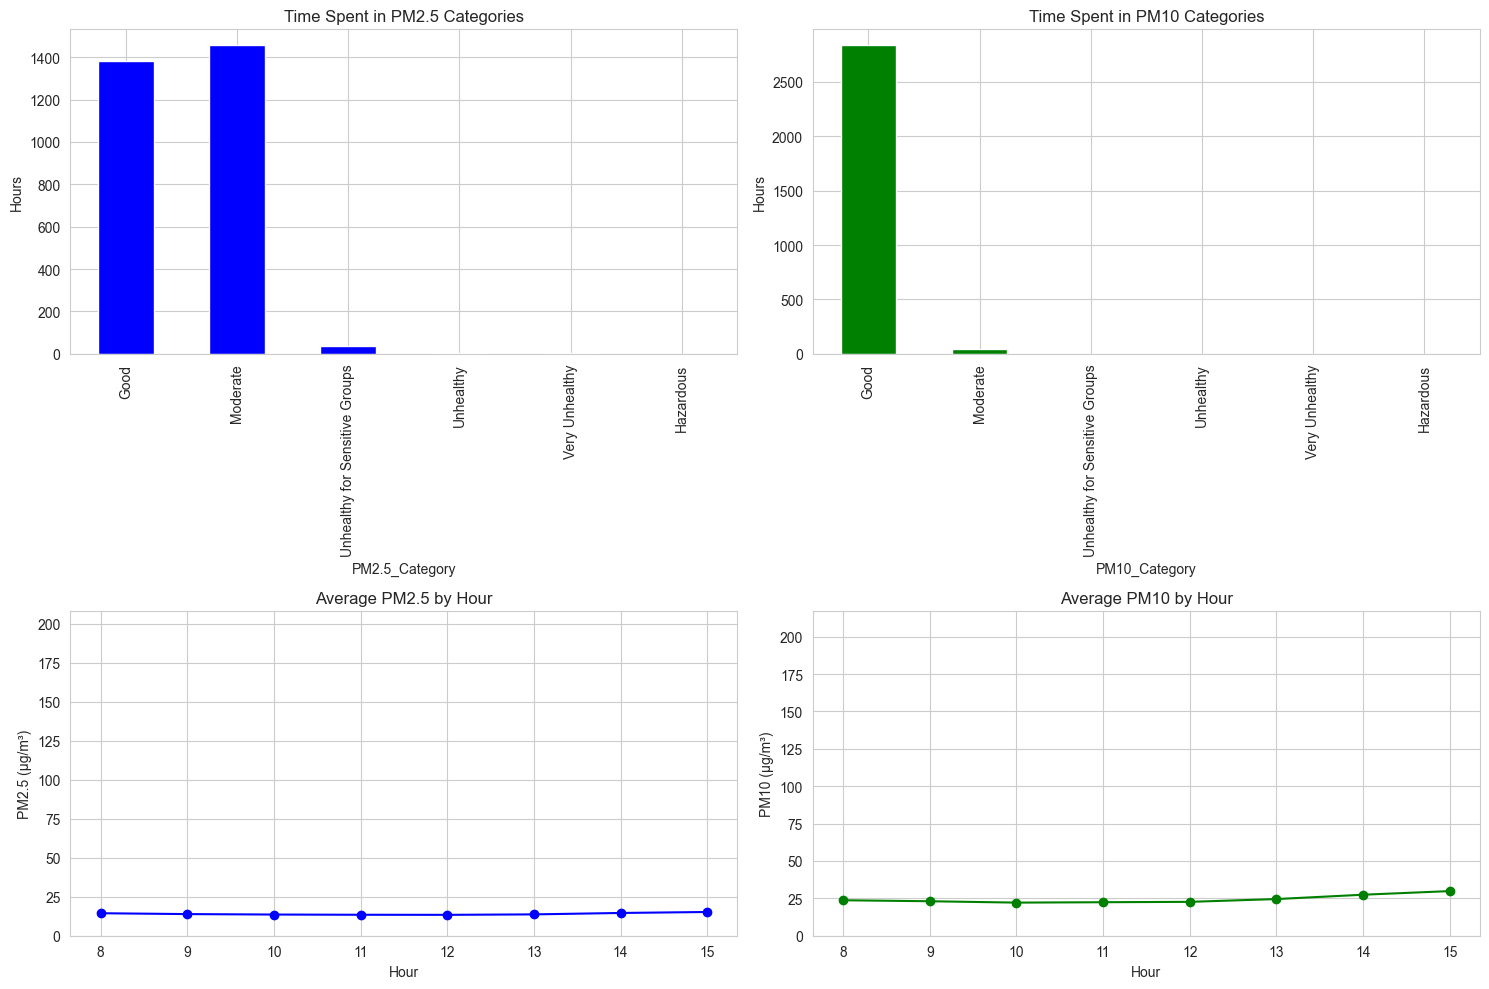

,Date,Time,PM2.5,PM10,PM2.5_Category,PM10_Category
8,01/01/24,08:00:00,55.2,62.0,Unhealthy for Sensitive Groups,Moderate
9,01/01/24,09:00:00,52.8,53.0,Unhealthy for Sensitive Groups,Good
10,01/01/24,10:00:00,32.9,38.0,Moderate,Good
11,01/01/24,11:00:00,30.5,34.0,Moderate,Good
12,01/01/24,12:00:00,25.1,29.0,Moderate,Good


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('air_quality_data.csv')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

school_hours = df[(df['Hour'] >= 8) & (df['Hour'] <= 15)].copy()

pm25_bins = [0.0, 12.0, 35.4, 55.4, 150.4, 250.4, np.inf]
pm25_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

pm10_bins = [0, 54, 154, 254, 354, 424, np.inf]
pm10_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

school_hours['PM2.5_Category'] = pd.cut(school_hours['PM2.5'], bins=pm25_bins, labels=pm25_labels, right=True, include_lowest=True)
school_hours['PM10_Category'] = pd.cut(school_hours['PM10'], bins=pm10_bins, labels=pm10_labels, right=True, include_lowest=True)

pm25_time = school_hours['PM2.5_Category'].value_counts().reindex(pm25_labels, fill_value=0)
pm10_time = school_hours['PM10_Category'].value_counts().reindex(pm10_labels, fill_value=0)

pm25_avg = school_hours['PM2.5'].mean()
pm10_avg = school_hours['PM10'].mean()

print("Time spent in each PM2.5 air quality level (hours):")
print(pm25_time)
print("\nTime spent in each PM10 air quality level (hours):")
print(pm10_time)
print(f"\nOverall average PM2.5 during school hours: {pm25_avg:.2f} µg/m³")
print(f"Overall average PM10 during school hours: {pm10_avg:.2f} µg/m³")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

pm25_time.plot(kind='bar', ax=axes[0, 0], title='Time Spent in PM2.5 Categories', color='blue')
axes[0, 0].set_ylabel('Hours')

pm10_time.plot(kind='bar', ax=axes[0, 1], title='Time Spent in PM10 Categories', color='green')
axes[0, 1].set_ylabel('Hours')

school_hours.groupby('Hour')['PM2.5'].mean().plot(ax=axes[1, 0], title='Average PM2.5 by Hour', marker='o', color='blue')
axes[1, 0].set_ylabel('PM2.5 (µg/m³)')
axes[1, 0].set_ylim(0, max(school_hours['PM2.5'])+5)

school_hours.groupby('Hour')['PM10'].mean().plot(ax=axes[1, 1], title='Average PM10 by Hour', marker='o', color='green')
axes[1, 1].set_ylabel('PM10 (µg/m³)')
axes[1, 1].set_ylim(0, max(school_hours['PM10'])+5)

plt.tight_layout()
plt.show()

school_hours[['Date', 'Time', 'PM2.5', 'PM10', 'PM2.5_Category', 'PM10_Category']].head()
